## 1. Import the Pacakges

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Read the Data

In [23]:
visa_df = pd.read_csv(r"C:\Users\D.JYOTSNA\OneDrive\Documents\Full Stack Data Science\2. DataFiles\Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


## 3. Divide into numerical and categorical columns

In [15]:
cat = visa_df.select_dtypes(include = 'object').columns
num = visa_df.select_dtypes(exclude = 'object').columns
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

# Histogram

In [17]:
wage_data = visa_df['prevailing_wage']

<img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_empirical-rule.jpg" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 810px; height: 216px; margin: 109.5px 0px; width: 432px;" alt="Empirical Rule (68-95-99.7) Explained | Built In" jsname="kn3ccd">

- u - 1sigma  to u + 1sigma ========= 68% data coverage

In [42]:
wage_mean = np.mean(wage_data)
wage_std = np.std(wage_data)
lb = wage_mean - 1 * wage_std
up = wage_mean + 1 * wage_std
con1 = wage_data > lb
con2 = wage_data < up
con = con1 & con2
len(visa_df[con])

17170

In [29]:
68*25480/100

17326.4

- the data is not normalized 

- outliers are there

In [46]:
def Emperical_rule(d,k,n):
    data = visa_df[d]
    data_mean = np.mean(data)
    data_std = np.std(data)
    lb = data_mean - k * data_std
    up = data_mean + k * data_std
    con1 = data > lb
    con2 = data < up
    con = con1 & con2
    print(len(visa_df[con]), n*len(visa_df)/100)
    print(len(visa_df[con]) == n*len(visa_df)/100)
Emperical_rule('prevailing_wage',3,99.7)

25186 25403.56
False


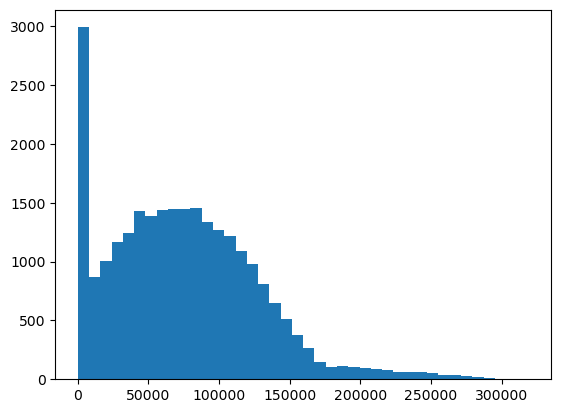

In [50]:
freq,interval,bins = plt.hist(wage_data, bins = 40)

In [52]:
freq,interval

(array([2992.,  871., 1005., 1170., 1242., 1434., 1385., 1443., 1444.,
        1445., 1457., 1335., 1268., 1217., 1088.,  978.,  807.,  645.,
         509.,  373.,  264.,  144.,  105.,  111.,  107.,   99.,   88.,
          79.,   65.,   64.,   58.,   53.,   33.,   33.,   29.,   19.,
           7.,    3.,    6.,    5.]),
 array([2.13670000e+00, 7.98234003e+03, 1.59625434e+04, 2.39427467e+04,
        3.19229500e+04, 3.99031534e+04, 4.78833567e+04, 5.58635600e+04,
        6.38437634e+04, 7.18239667e+04, 7.98041700e+04, 8.77843734e+04,
        9.57645767e+04, 1.03744780e+05, 1.11724983e+05, 1.19705187e+05,
        1.27685390e+05, 1.35665593e+05, 1.43645797e+05, 1.51626000e+05,
        1.59606203e+05, 1.67586407e+05, 1.75566610e+05, 1.83546813e+05,
        1.91527017e+05, 1.99507220e+05, 2.07487423e+05, 2.15467627e+05,
        2.23447830e+05, 2.31428033e+05, 2.39408237e+05, 2.47388440e+05,
        2.55368643e+05, 2.63348847e+05, 2.71329050e+05, 2.79309253e+05,
        2.87289457e+05, 2.9526

In [58]:
lb = 2.13670000e+00
up = 7.98234003e+03
con1 = wage_data >= lb
con2 = wage_data < up
con = con1 & con2
len(visa_df[con])

2992

# Outlier Analysis

### Box-Plot

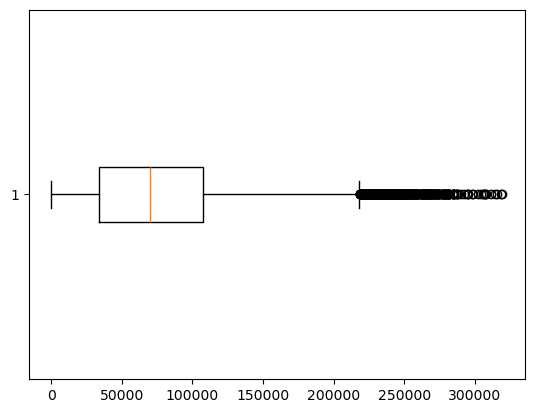

In [67]:
plt.boxplot(wage_data, vert = False)
plt.show()

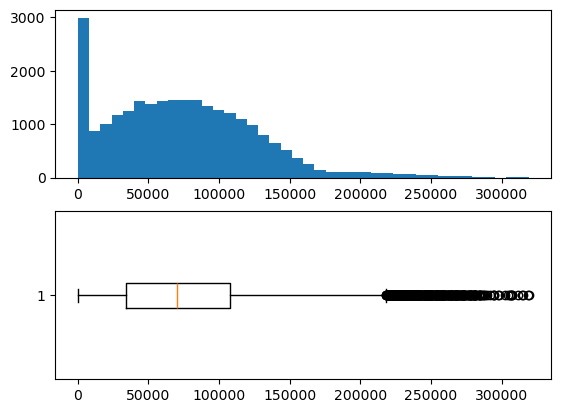

In [71]:
plt.subplot(2,1,1).hist(wage_data, bins = 40)
plt.subplot(2,1,2).boxplot(wage_data, vert = False)
plt.show()

## Outliers Data


          Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR


In [78]:
Q1 = np.percentile(wage_data,25)
Q3 = np.percentile(wage_data,75)
IQR = Q3 - Q1
lb = Q1 - 1.5*IQR
up = Q3 + 1.5*IQR
con1 = wage_data < lb
con2 = wage_data > up
con = con1 | con2
outliers_data = visa_df[con]
len(outliers_data)

427

In [80]:
Q1 = np.percentile(wage_data,25)
Q3 = np.percentile(wage_data,75)
IQR = Q3 - Q1
lb = Q1 - 1.5*IQR
up = Q3 + 1.5*IQR
con1 = wage_data > lb
con2 = wage_data < up
con = con1 & con2
non_outliers_data = visa_df[con]
len(non_outliers_data)

25053

- Non Outliers : 25053

- Outliers : 427

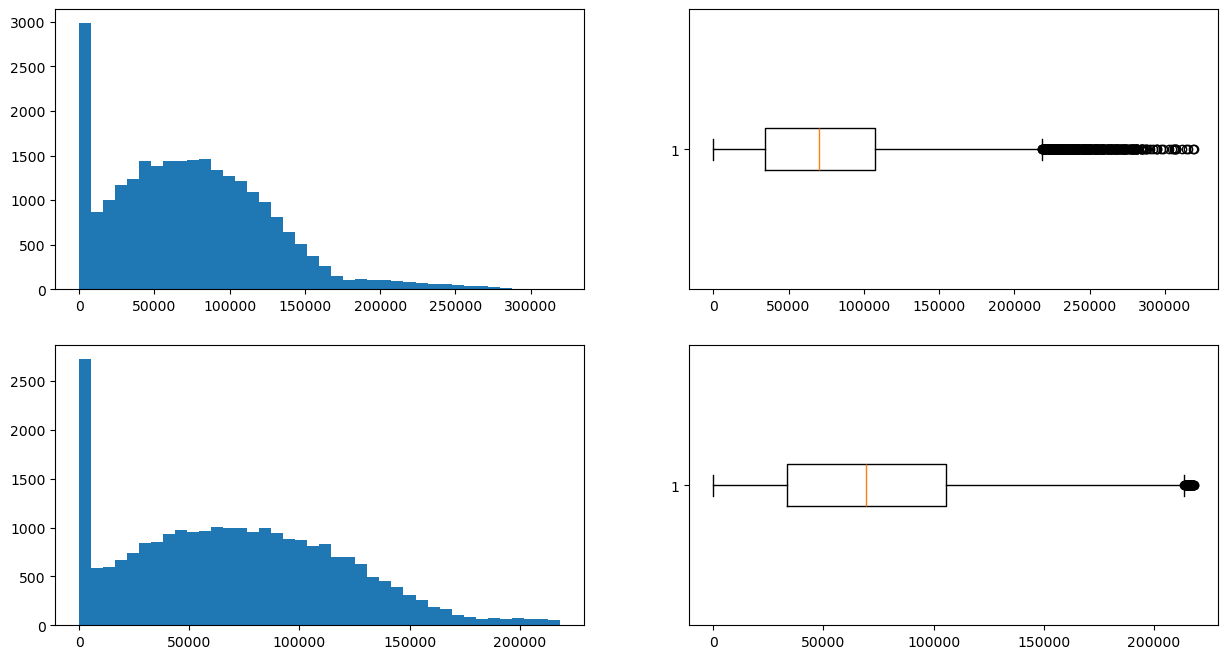

In [95]:
plt.figure(figsize = (15,8))
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'], bins = 40)
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage'], vert = False)
plt.subplot(2,2,3).hist(non_outliers_data['prevailing_wage'], bins = 40)
plt.subplot(2,2,4).boxplot(non_outliers_data['prevailing_wage'], vert = False)
plt.show()

# Outliers Imputations

- Method - 1: cap (Winsorization)

    - less than lb outliers impute with lb value

    - greater than up outliers impute with up value

- Method - 2: Every outlier replace with median

## Method -1 : cap(Winsorization)

In [101]:
q1 = np.percentile(wage_data,25)
q3 = np.percentile(wage_data,75)
IQR = q3 - q1
lb = q1 - 1.5*IQR
up = q3 + 1.5*IQR

In [105]:
l = []
for i in wage_data:
    if i < lb:
        l.append(lb)
    elif i > up:
        l.append(up)
    else:
        l.append(i)       

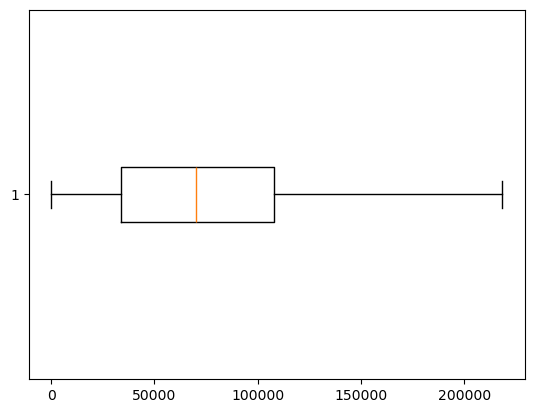

In [109]:
plt.boxplot(l, vert = False)
plt.show()